## Unsupervised Learning Eploration with the Sell your Phone dataset 

*get it? CellPhone!!!!*

By. Dr. Vukosi Marivate http://www.vima.co.za

This notebook takes data from a crowdsourced phone datataset. You can see the original google form here http://bitly.com/phonepricedata

Some preprocessing has been done in Google spreadsheets. Namely standardizing all the Brands of the phones. In this notebook I do not remove outliers. I do remove submissions without all of the information (you could resolve this with data imputation).

**Acknowledgements:** Jessica Nemasisi - Jessica helped with collection of the data and some initial analysis as part of ther Honours Degree Work. 

In [1]:
import pandas as pd

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [73]:
df = pd.read_excel("../data/sell_your_phone.xlsx")

In [74]:
df.head()

,Timestamp,Brand,Age,Buying_Price,Camera,Battery,Screen_Size,Condition,Proposed_Sell_Price,Broken_Screen,Internal Storage Size in Gigabytes (GB)
0,2015-12-09 18:05:54.559,Samsung,8,160,5.0,24,4.5,7,2000.0,No,8.0
1,2016-02-10 22:20:49.958,Sony,19,207,4.0,12,3.5,8,3000.0,No,5.0
2,2015-12-03 18:33:11.153,Samsung,9,250,2.0,4,3.5,5,200.0,No,2.0
3,2016-02-09 13:32:25.140,Nokia,19,650,2.0,14,3.5,9,400.0,No,1.0
4,2015-11-03 15:56:41.481,Vodafone,13,699,2.0,10,3.2,7,450.0,No,4.0


In [75]:
df.describe()

,Age,Buying_Price,Camera,Battery,Screen_Size,Condition,Proposed_Sell_Price,Internal Storage Size in Gigabytes (GB)
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,115.000000
mean,14.451613,4186.798387,7.184758,14.459677,4.362903,7.274194,2606.205645,11.210861
std,10.873519,3291.121481,4.289032,12.471365,0.924769,2.249982,2160.235391,10.054174
min,0.000000,160.000000,0.310000,1.000000,2.400000,2.000000,2.500000,0.049000
25%,6.000000,1800.000000,5.000000,6.000000,3.700000,6.000000,1000.000000,4.000000
50%,12.000000,3000.000000,5.000000,12.000000,4.500000,8.000000,2000.000000,8.000000
75%,21.000000,6000.000000,8.500000,18.250000,4.700000,9.000000,3600.000000,16.000000
max,48.000000,15576.000000,20.000000,72.000000,10.000000,10.000000,10000.000000,64.000000


Dropping any rows with missing values. This is extreme, you can do some imputation if needed.

In [76]:
df = df.dropna()

Lets get rid of that timestamp 

In [77]:
brands = df.Brand.values
df = df.drop(['Brand'],axis=1)
df = df.drop(['Timestamp'],axis=1)

In [78]:
#Some default stuff for my plotting
aspect_mult = 0.9
figsize(aspect_mult*16,aspect_mult*9)
linewidth = 3

Currently the data is not really in a nice format for Machine learning methods. Most methods don't deal well with categorical data (like Brand and Broken Screen). Let's do some one-hot-encoding.

In [79]:
#One Hot Encoding
cat_cols = ["Broken_Screen"]
df_continuous = pd.get_dummies(df,columns=cat_cols)
df_continuous.columns

Index([u'Age', u'Buying_Price', u'Camera', u'Battery', u'Screen_Size',
       u'Condition', u'Proposed_Sell_Price',
       u'Internal Storage Size in Gigabytes (GB)', u'Broken_Screen_No',
       u'Broken_Screen_Yes'],
      dtype='object')

In [80]:
df_continuous.head()

,Age,Buying_Price,Camera,Battery,Screen_Size,Condition,Proposed_Sell_Price,Internal Storage Size in Gigabytes (GB),Broken_Screen_No,Broken_Screen_Yes
0,8,160,5.0,24,4.5,7,2000.0,8.0,1,0
1,19,207,4.0,12,3.5,8,3000.0,5.0,1,0
2,9,250,2.0,4,3.5,5,200.0,2.0,1,0
3,19,650,2.0,14,3.5,9,400.0,1.0,1,0
4,13,699,2.0,10,3.2,7,450.0,4.0,1,0


In [81]:
df_continuous_normed = (df_continuous - df_continuous.mean()) / df_continuous.std()

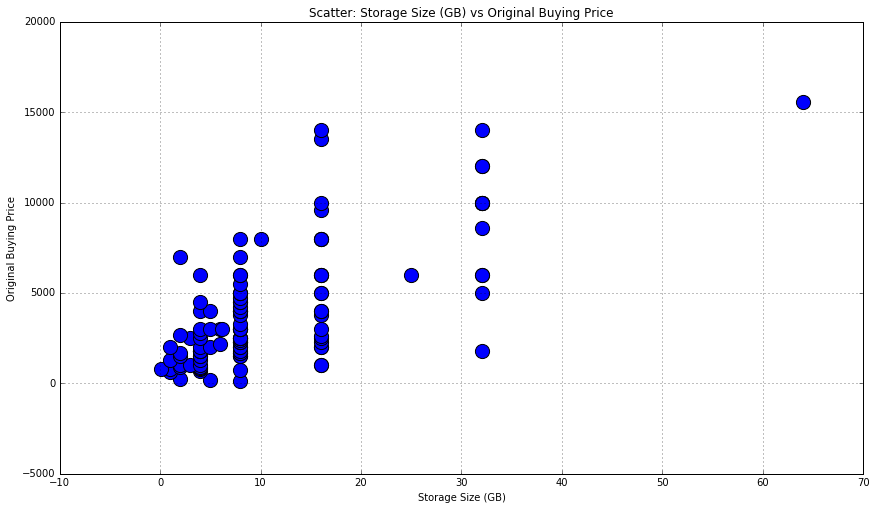

In [82]:
plt.scatter(df_continuous['Internal Storage Size in Gigabytes (GB)'], 
            df_continuous.Buying_Price, 
            s = 200)
#Add some context to the plot
plt.title("Scatter: Storage Size (GB) vs Original Buying Price")
plt.xlabel("Storage Size (GB)")
plt.ylabel("Original Buying Price")
plt.grid()

## Clustering

In [83]:
from sklearn.cluster import KMeans

In [84]:
X = df_continuous.values
reps = 5

In [85]:
within_cluster = []
x_range = range(2,41)
for k in x_range:
    temp_wc = []
    for i in range(reps):
        clf = KMeans(n_clusters=k,n_jobs=-1)
        clf.fit(X)
        temp_wc.append(clf.inertia_)
    within_cluster.append(temp_wc)
within_cluster = np.array(within_cluster)

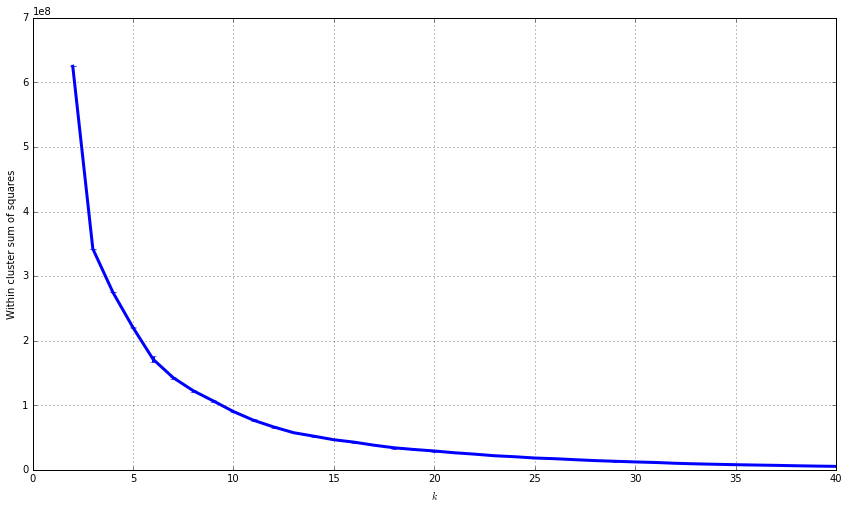

In [86]:
pyplot.errorbar(x_range,np.mean(within_cluster,axis=1),
                yerr = np.std(within_cluster,axis=1), linewidth=linewidth)
plt.ylabel("Within cluster sum of squares")
plt.xlabel("$k$")
plt.grid()

In [87]:
k = 15

In [88]:
clf = KMeans(n_clusters=k,n_jobs=-1)
clf.fit(X)
cluster_labels = clf.predict(X)

In [89]:
c= ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, k)]
cluster_colors = []

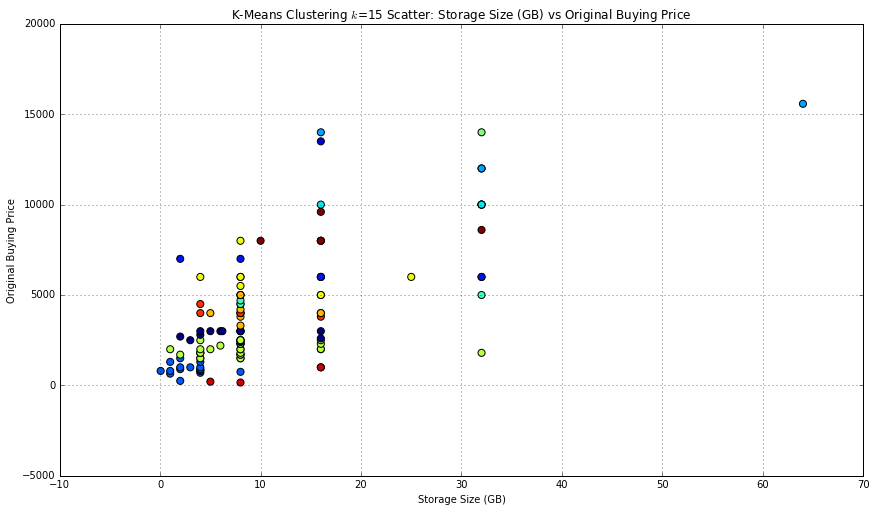

In [90]:
plt.scatter(df_continuous['Internal Storage Size in Gigabytes (GB)'],
            df_continuous.Buying_Price, c=cluster_labels,
            s=50,label=cluster_labels)
plt.title("Clustering Bag Words $k=20$",fontsize=20)
plt.title("K-Means Clustering $k$=" + str(k)+ " Scatter: Storage Size (GB) vs Original Buying Price")
plt.xlabel("Storage Size (GB)")
plt.ylabel("Original Buying Price")
plt.grid()


In [91]:
X_standardised = (df_continuous.values -np.mean(df_continuous.values,axis=0))/np.std(df_continuous.values,axis=0)

In [92]:
np.mean(X_standardised,axis=0)

array([  3.81337474e-17,   1.35157586e-16,   1.73774039e-17,
         4.48916266e-17,  -2.57764824e-16,  -2.89623398e-17,
        -1.08126068e-16,  -6.95096155e-17,   8.97832533e-17,
         3.57202191e-17])

In [93]:
np.std(X_standardised,axis=0)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [94]:
within_cluster = []
x_range = range(2,41)
for k in x_range:
    temp_wc = []
    for i in range(reps):
        clf = KMeans(n_clusters=k,n_jobs=-1)
        clf.fit(X_standardised)
        temp_wc.append(clf.inertia_)
    within_cluster.append(temp_wc)
within_cluster = np.array(within_cluster)

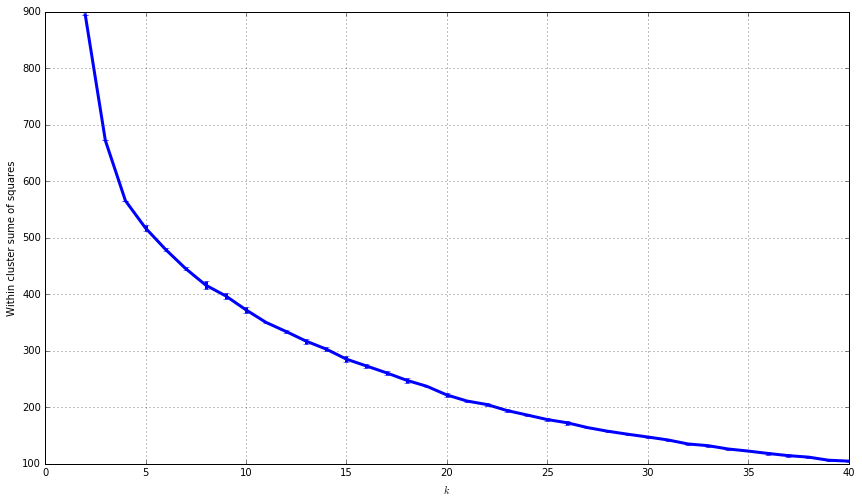

In [95]:
pyplot.errorbar(x_range,np.mean(within_cluster,axis=1),
                yerr = np.std(within_cluster,axis=1), linewidth=linewidth)
plt.ylabel("Within cluster sume of squares")
plt.xlabel("$k$")
plt.grid()

In [96]:
k=15
clf = KMeans(n_clusters=k,n_jobs=-1)
clf.fit(X_standardised)
cluster_labels = clf.predict(X_standardised)

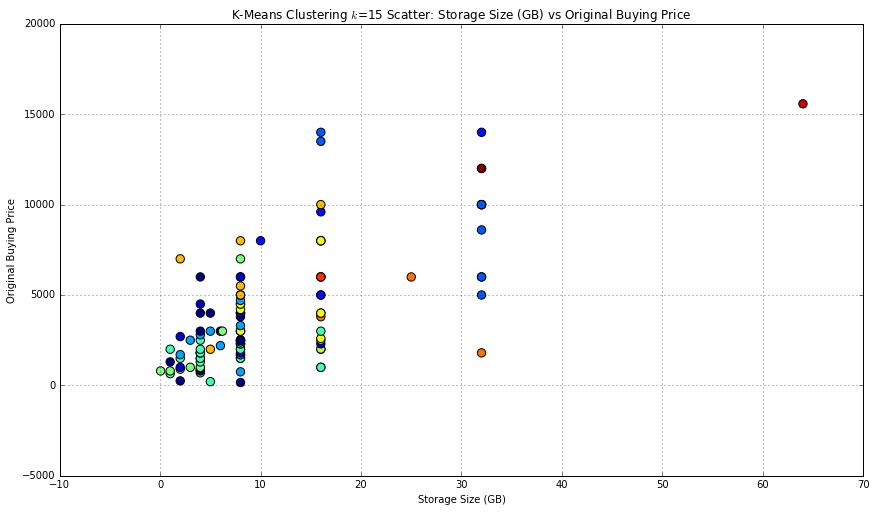

In [107]:
plt.scatter(df_continuous['Internal Storage Size in Gigabytes (GB)'],
            df_continuous.Buying_Price, c=cluster_labels,
            s=70,label=cluster_labels)
plt.title("K-Means Clustering $k$=" + str(k)+ " Scatter: Storage Size (GB) vs Original Buying Price")
plt.xlabel("Storage Size (GB)")
plt.ylabel("Original Buying Price")
plt.grid()


In [98]:
from sklearn.decomposition import PCA

In [99]:
pca = PCA(n_components=2)
pca.fit(X_standardised)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [100]:
X_pca = pca.transform(X_standardised)
X_pca.shape

(115, 2)

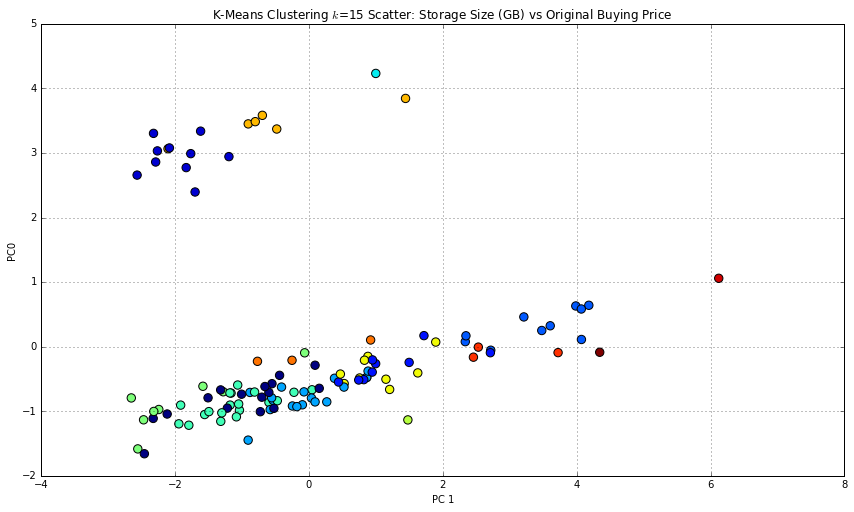

In [108]:
plt.scatter(X_pca[:,0],X_pca[:,1], c=cluster_labels,
            s=70,label=cluster_labels)
plt.title("K-Means Clustering $k$=" + str(k)+ " Scatter: Storage Size (GB) vs Original Buying Price")
plt.xlabel("PC 1")
plt.ylabel("PC0")
plt.grid()

In [102]:
from sklearn.manifold import TSNE

In [103]:
tsne = TSNE(n_components=2)

In [104]:
X_tsne = tsne.fit_transform(X_standardised)

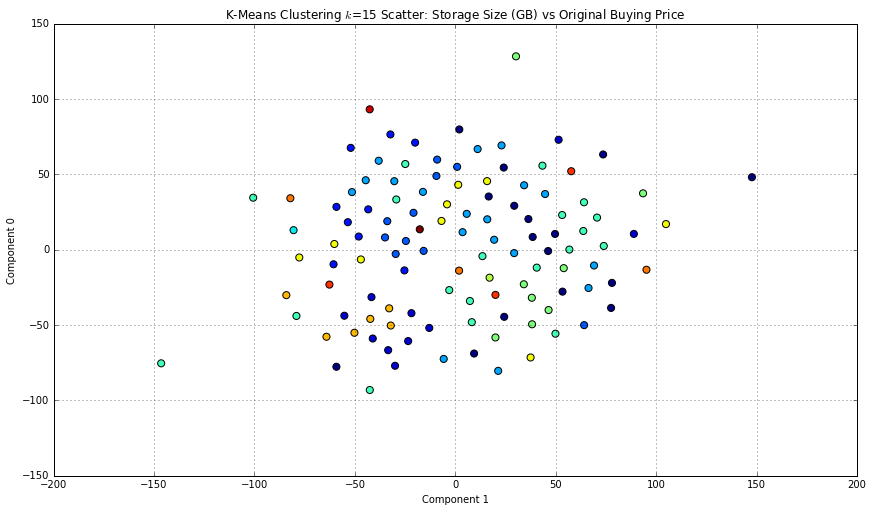

In [105]:
plt.scatter(X_tsne[:,0],X_tsne[:,1], c=cluster_labels,
            s=50,label=cluster_labels)
plt.title("K-Means Clustering $k$=" + str(k)+ " Scatter: Storage Size (GB) vs Original Buying Price")
plt.xlabel("Component 1")
plt.ylabel("Component 0")
plt.grid()